# Multiple Linear Regression : Housing Prices Dataset


### Author: Gopal Karemore


CASE A
Machine learning (basic machine learning methodology)
Based on the dataset attached to the exercise (housingdata.csv and desription_plus_metadata)

•	Choose a machine learning model for predicting house prices

•	Describe the model 

•	Describe methods for choosing relevant features

•	Describe how you would validate and test your model

•	Describe and design a machine learning pipeline and architecture: How would you deploy your model to production?



#### Regression Project: Boston House Prices

Variables in order: 


(1)CRIM per capita crime rate by town 

(2)ZN proportion of residential land zoned for lots over 25,000 sq.ft.

(3)INDUS proportion of non-retail business acres per town 

(4)CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 

(5)NOX nitric oxides concentration (parts per 10 million) 

(6)RM average number of rooms per dwelling

(7)AGE proportion of owner-occupied units built prior to 1940 

(8)DIS weighted distances to five Boston employment centres

(9)RAD index of accessibility to radial highways 

(10)TAX full-value property-tax rate per ten thousadn

(11)PTRATIO pupil-teacher ratio by town 

(12)B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 

(13)LSTA lower status of the population 

(14) (Y label) MEDV Median value of owner-occupied homes in 1000's




## Solution: 

Given ML problem can be solved by Regression. Since this question is tuned to evluate the basic knowledge of ML algorithms and methods. I will compare major regression methods available in scikit-learn and also compare its performance with deep learning  and ensemble modeling.

In [1]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.formula.api as smf
from pylab import rcParams

# Load dataset

In [4]:

filename = 'housingdata.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, names=names)


# Review of the dataset


In [5]:

dataset.shape
dataset.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Data Visulaization

## Histograms of Individual predictors
### It is always a good practice to look at the distribustion of individual predictors inorder to get some idea about the approach one may have to take for classifier selection

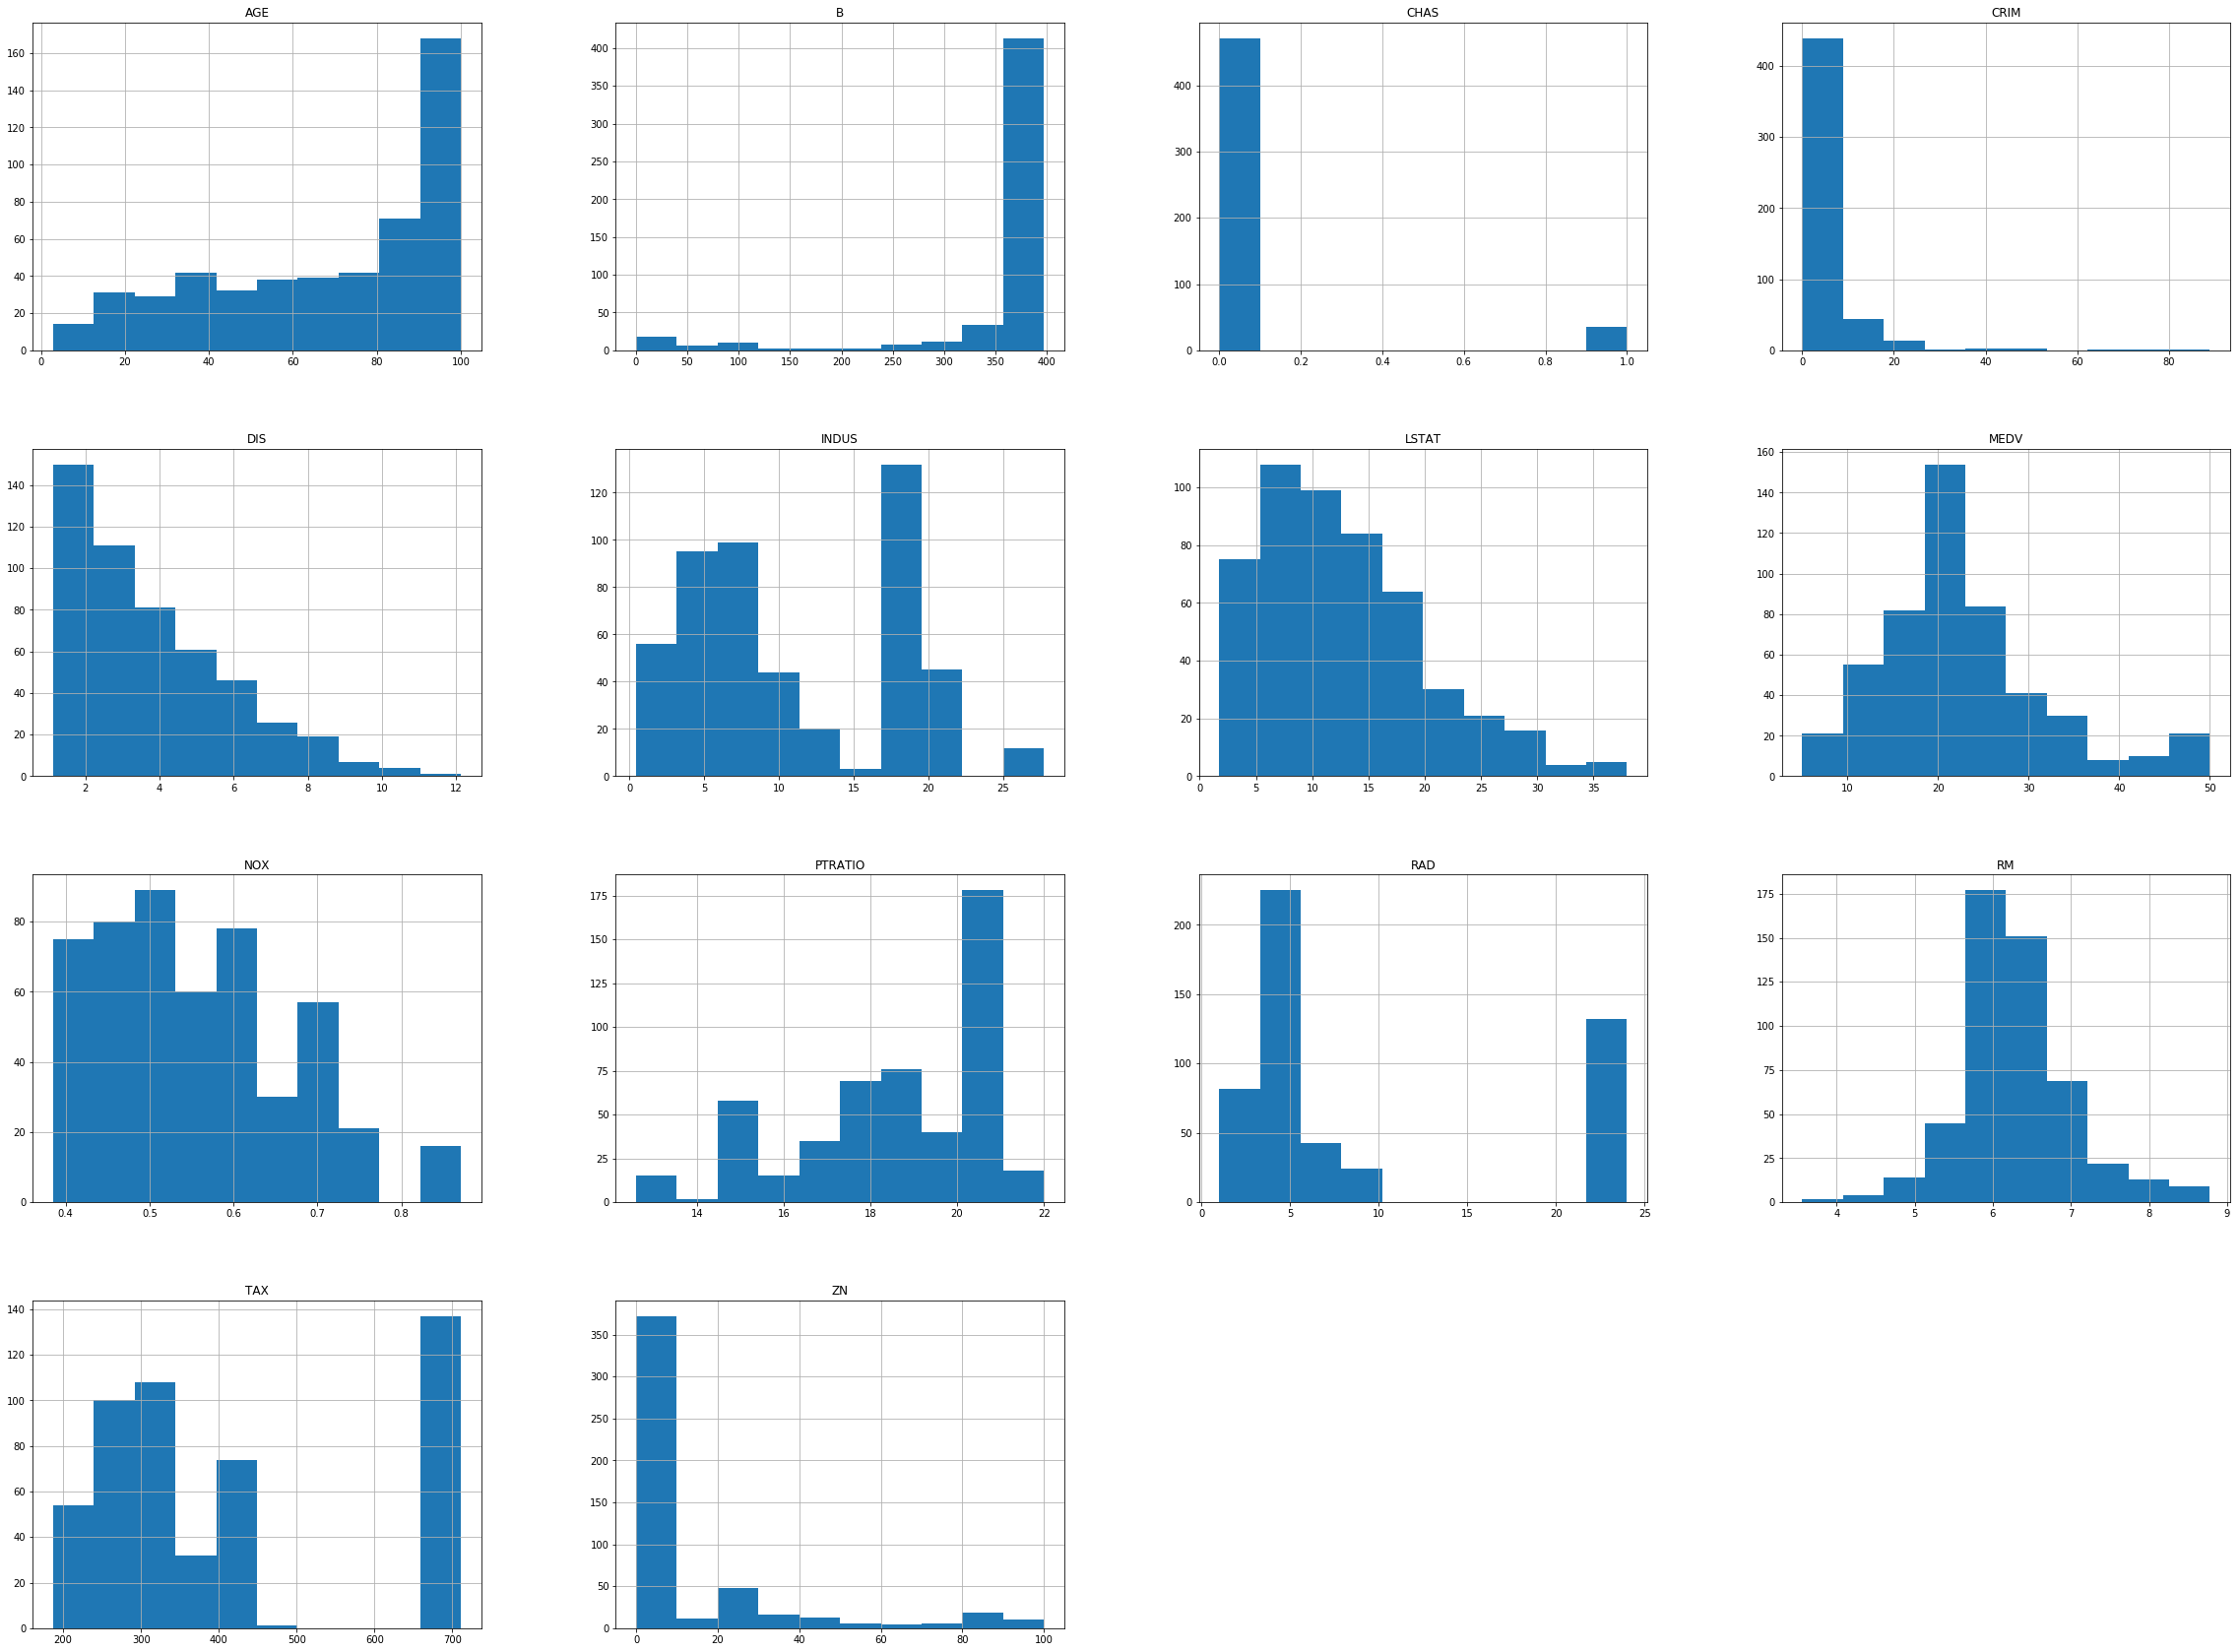

In [6]:
# histograms
%matplotlib inline
rcParams['figure.figsize'] = 40, 30
dataset.hist()
pyplot.show()

## *Observation*:
### Some prectors are exponetial, Poisson's distributions e.g. AGE, B,  CRIM. Some have bimodal distribution e.g. TAX and RAD.

## To investigate further lets look at the density plots which smooth the distribution and easy to interprite

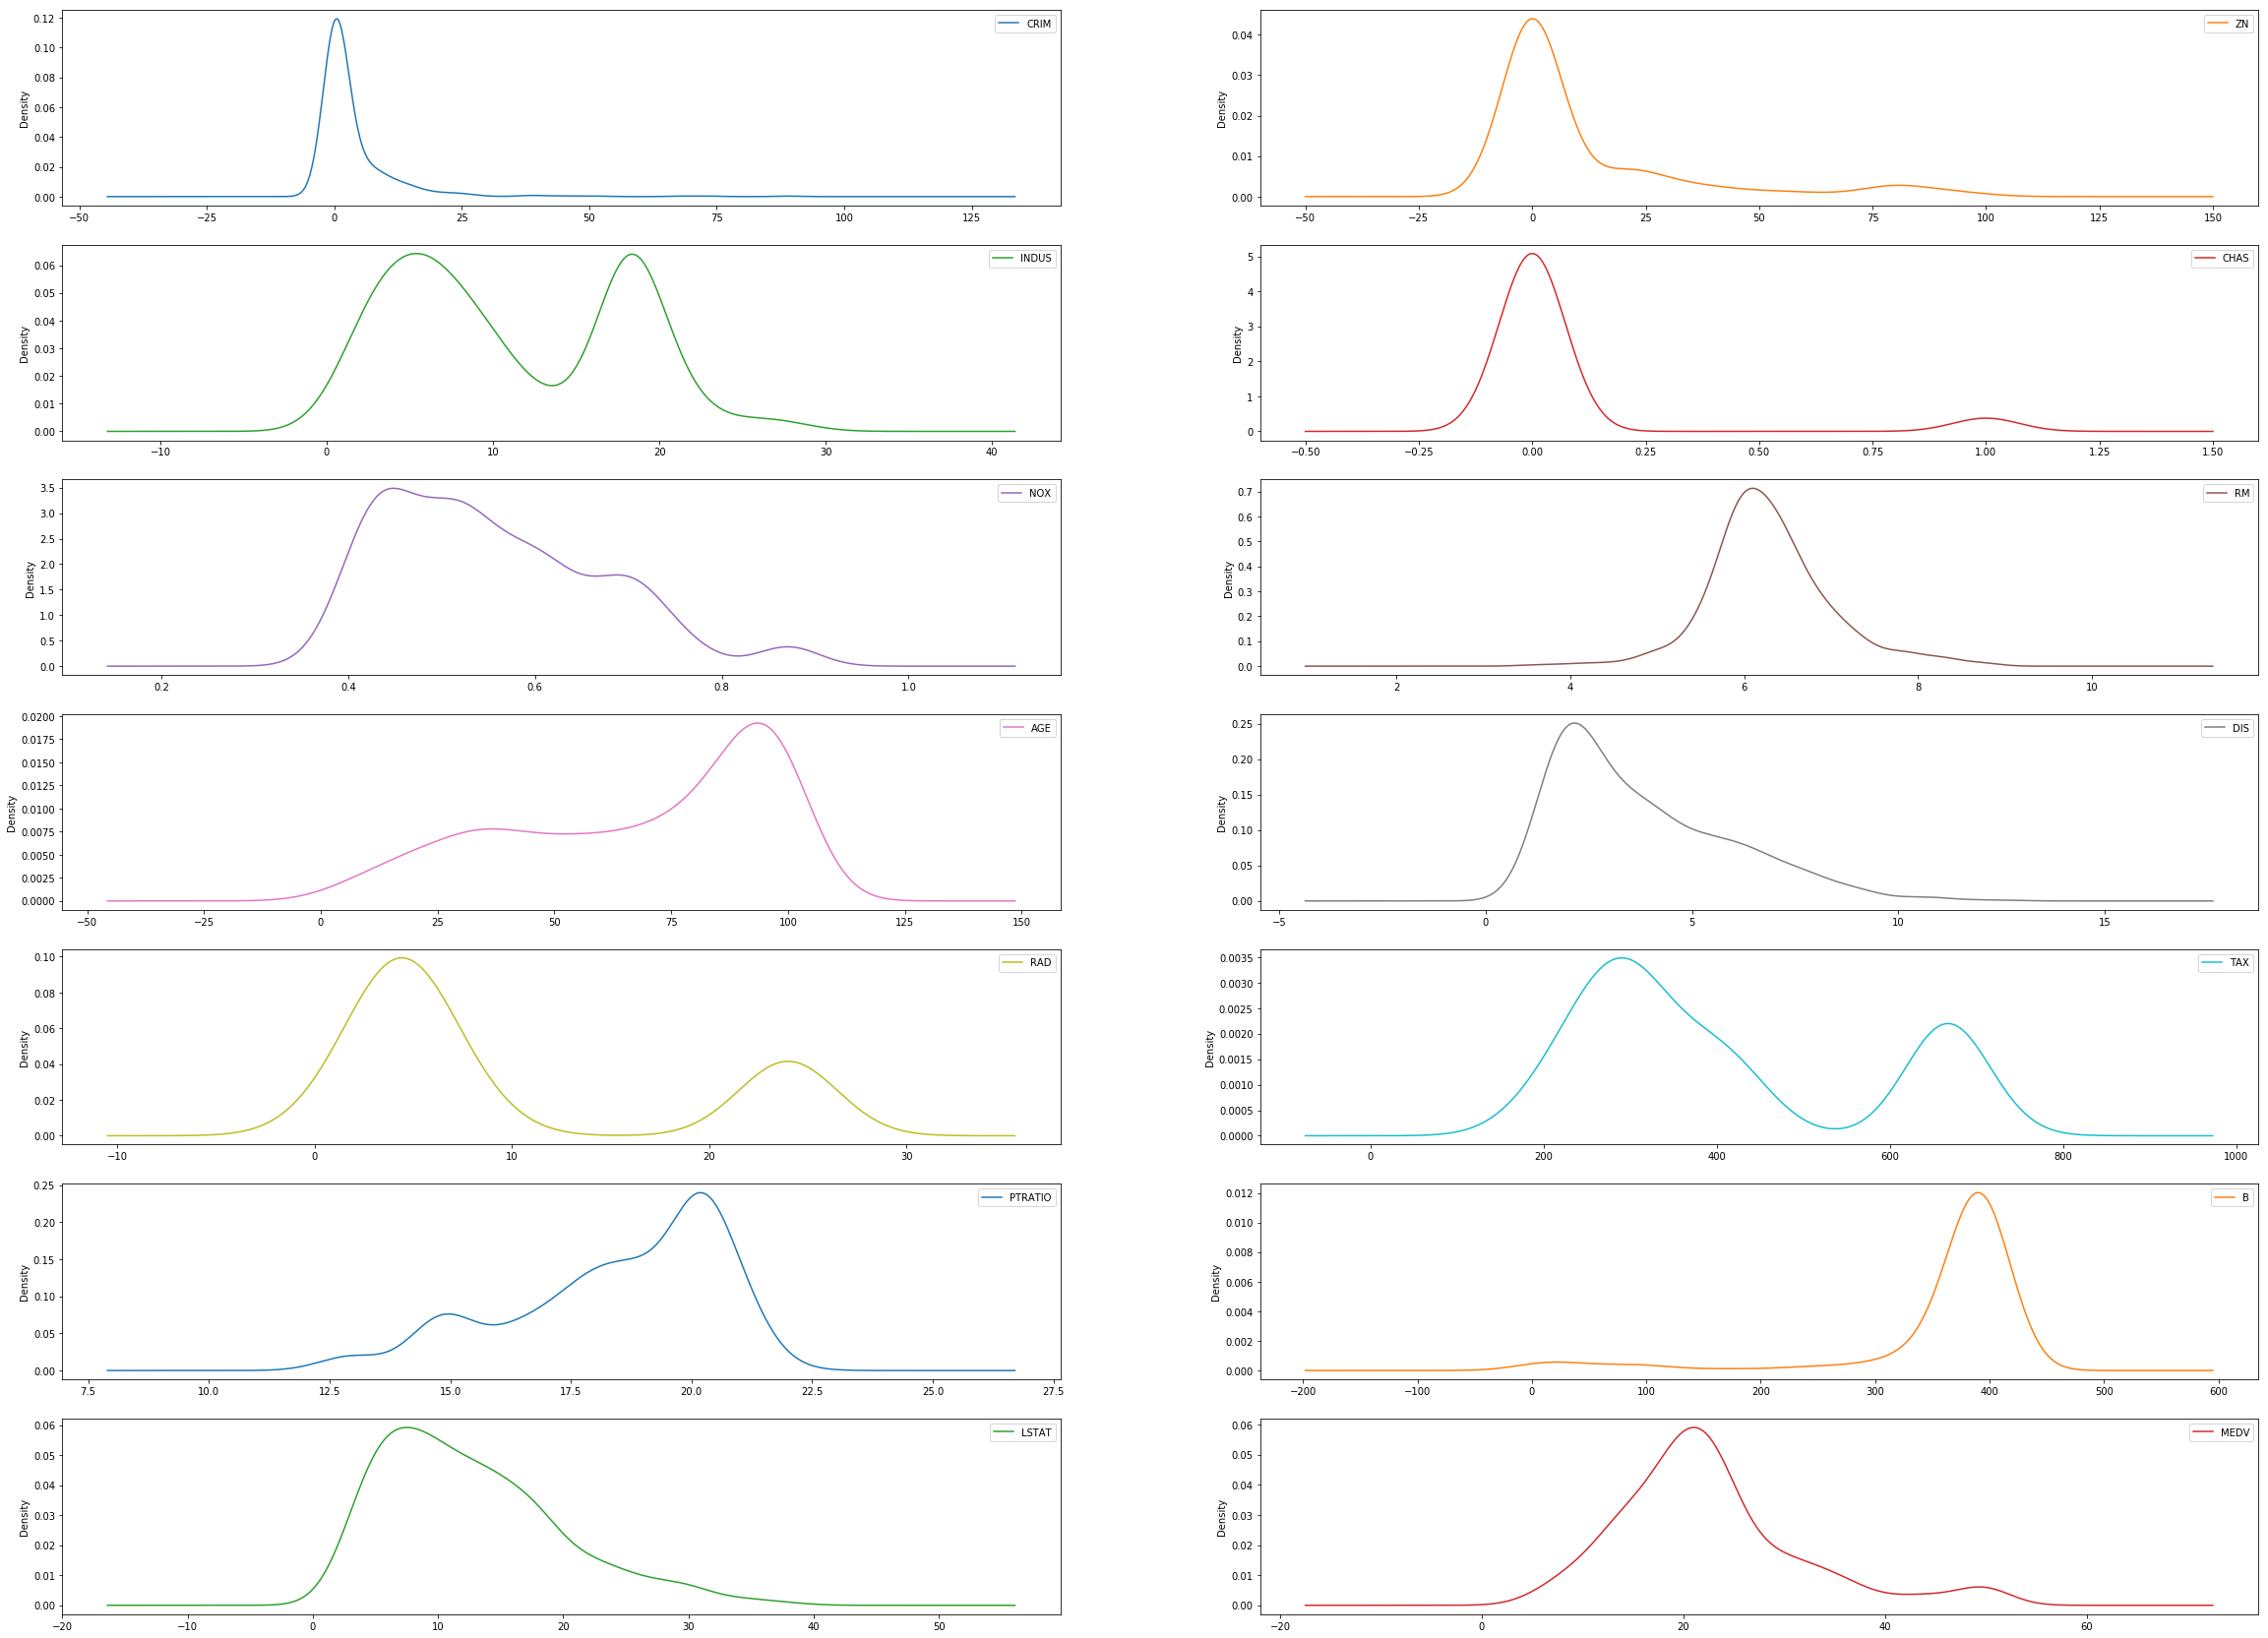

In [7]:
# density
rcParams['figure.figsize'] = 40, 30
dataset.plot(kind='density', subplots=True, layout=(7,2), sharex=False)
pyplot.show()

## It is also important to understand the 1st order statistics of individual predictors. Box-whisker's plot is best tool for this. It also helps to understand the deviation of expected value and outliers if any.

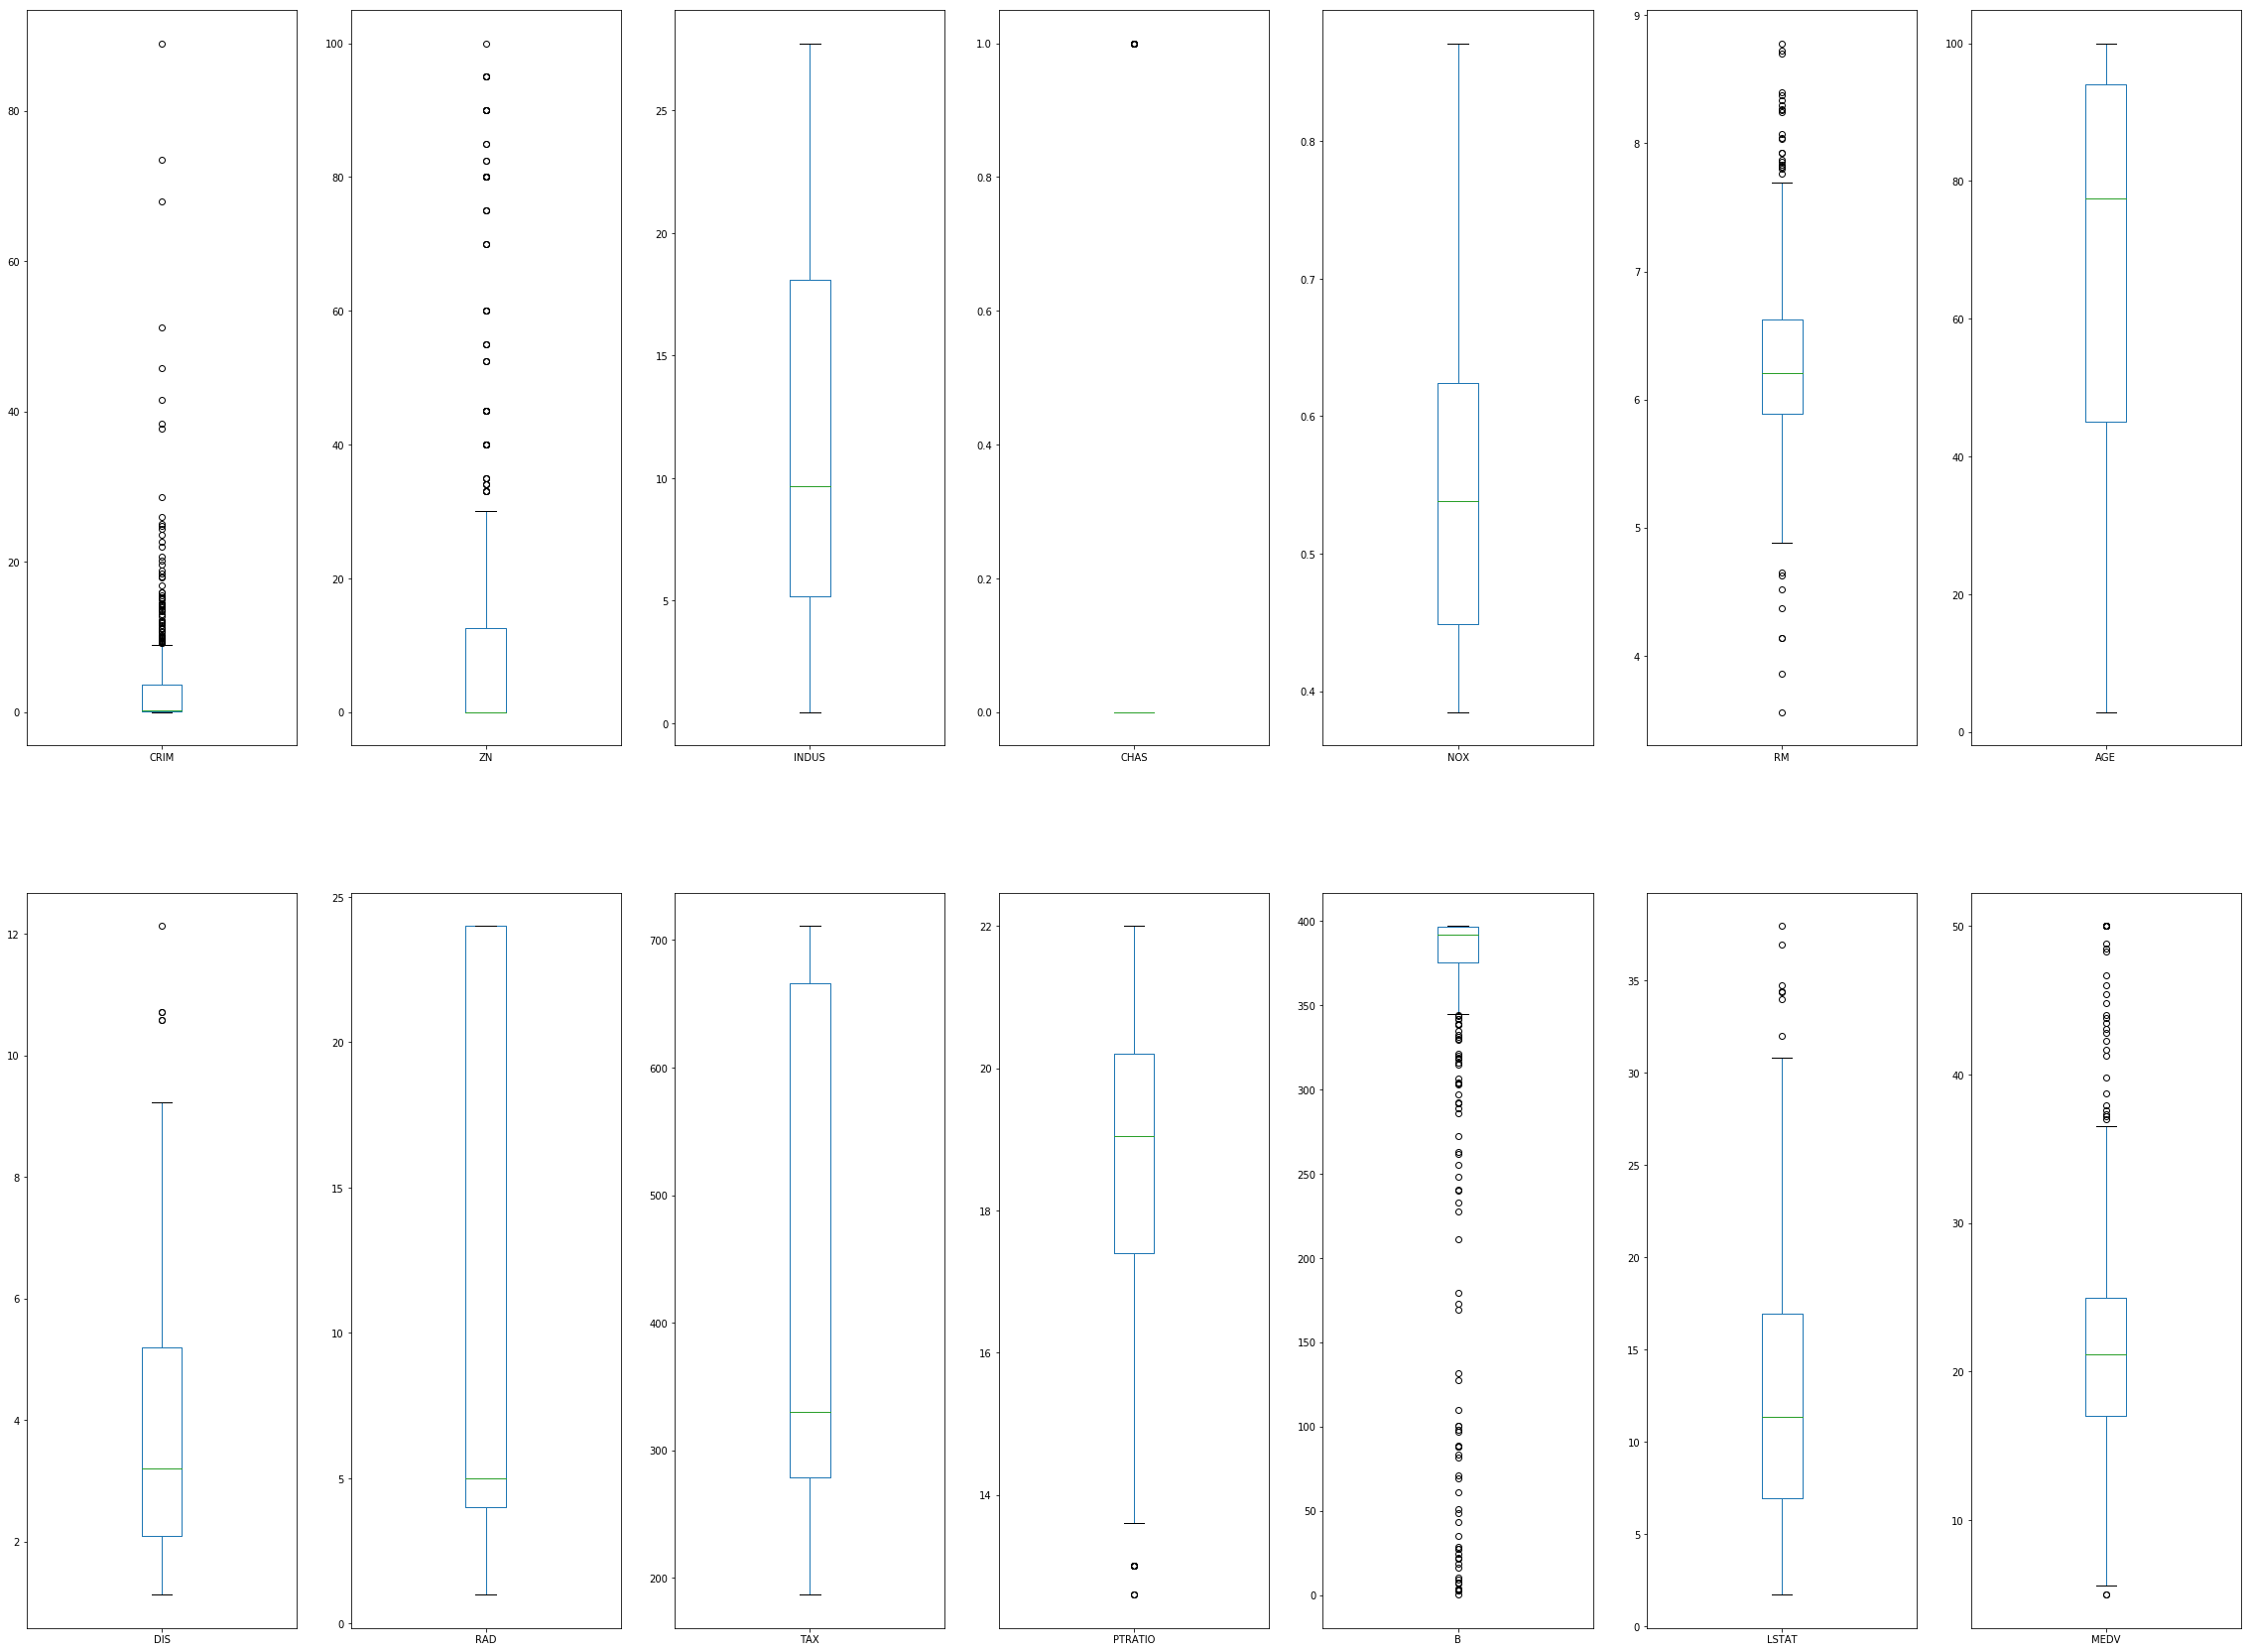

In [8]:
# box and whisker plots
rcParams['figure.figsize'] = 40, 30
dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False)
pyplot.show()






# Now lets look at interations between the predictors and also prectors to response variable.

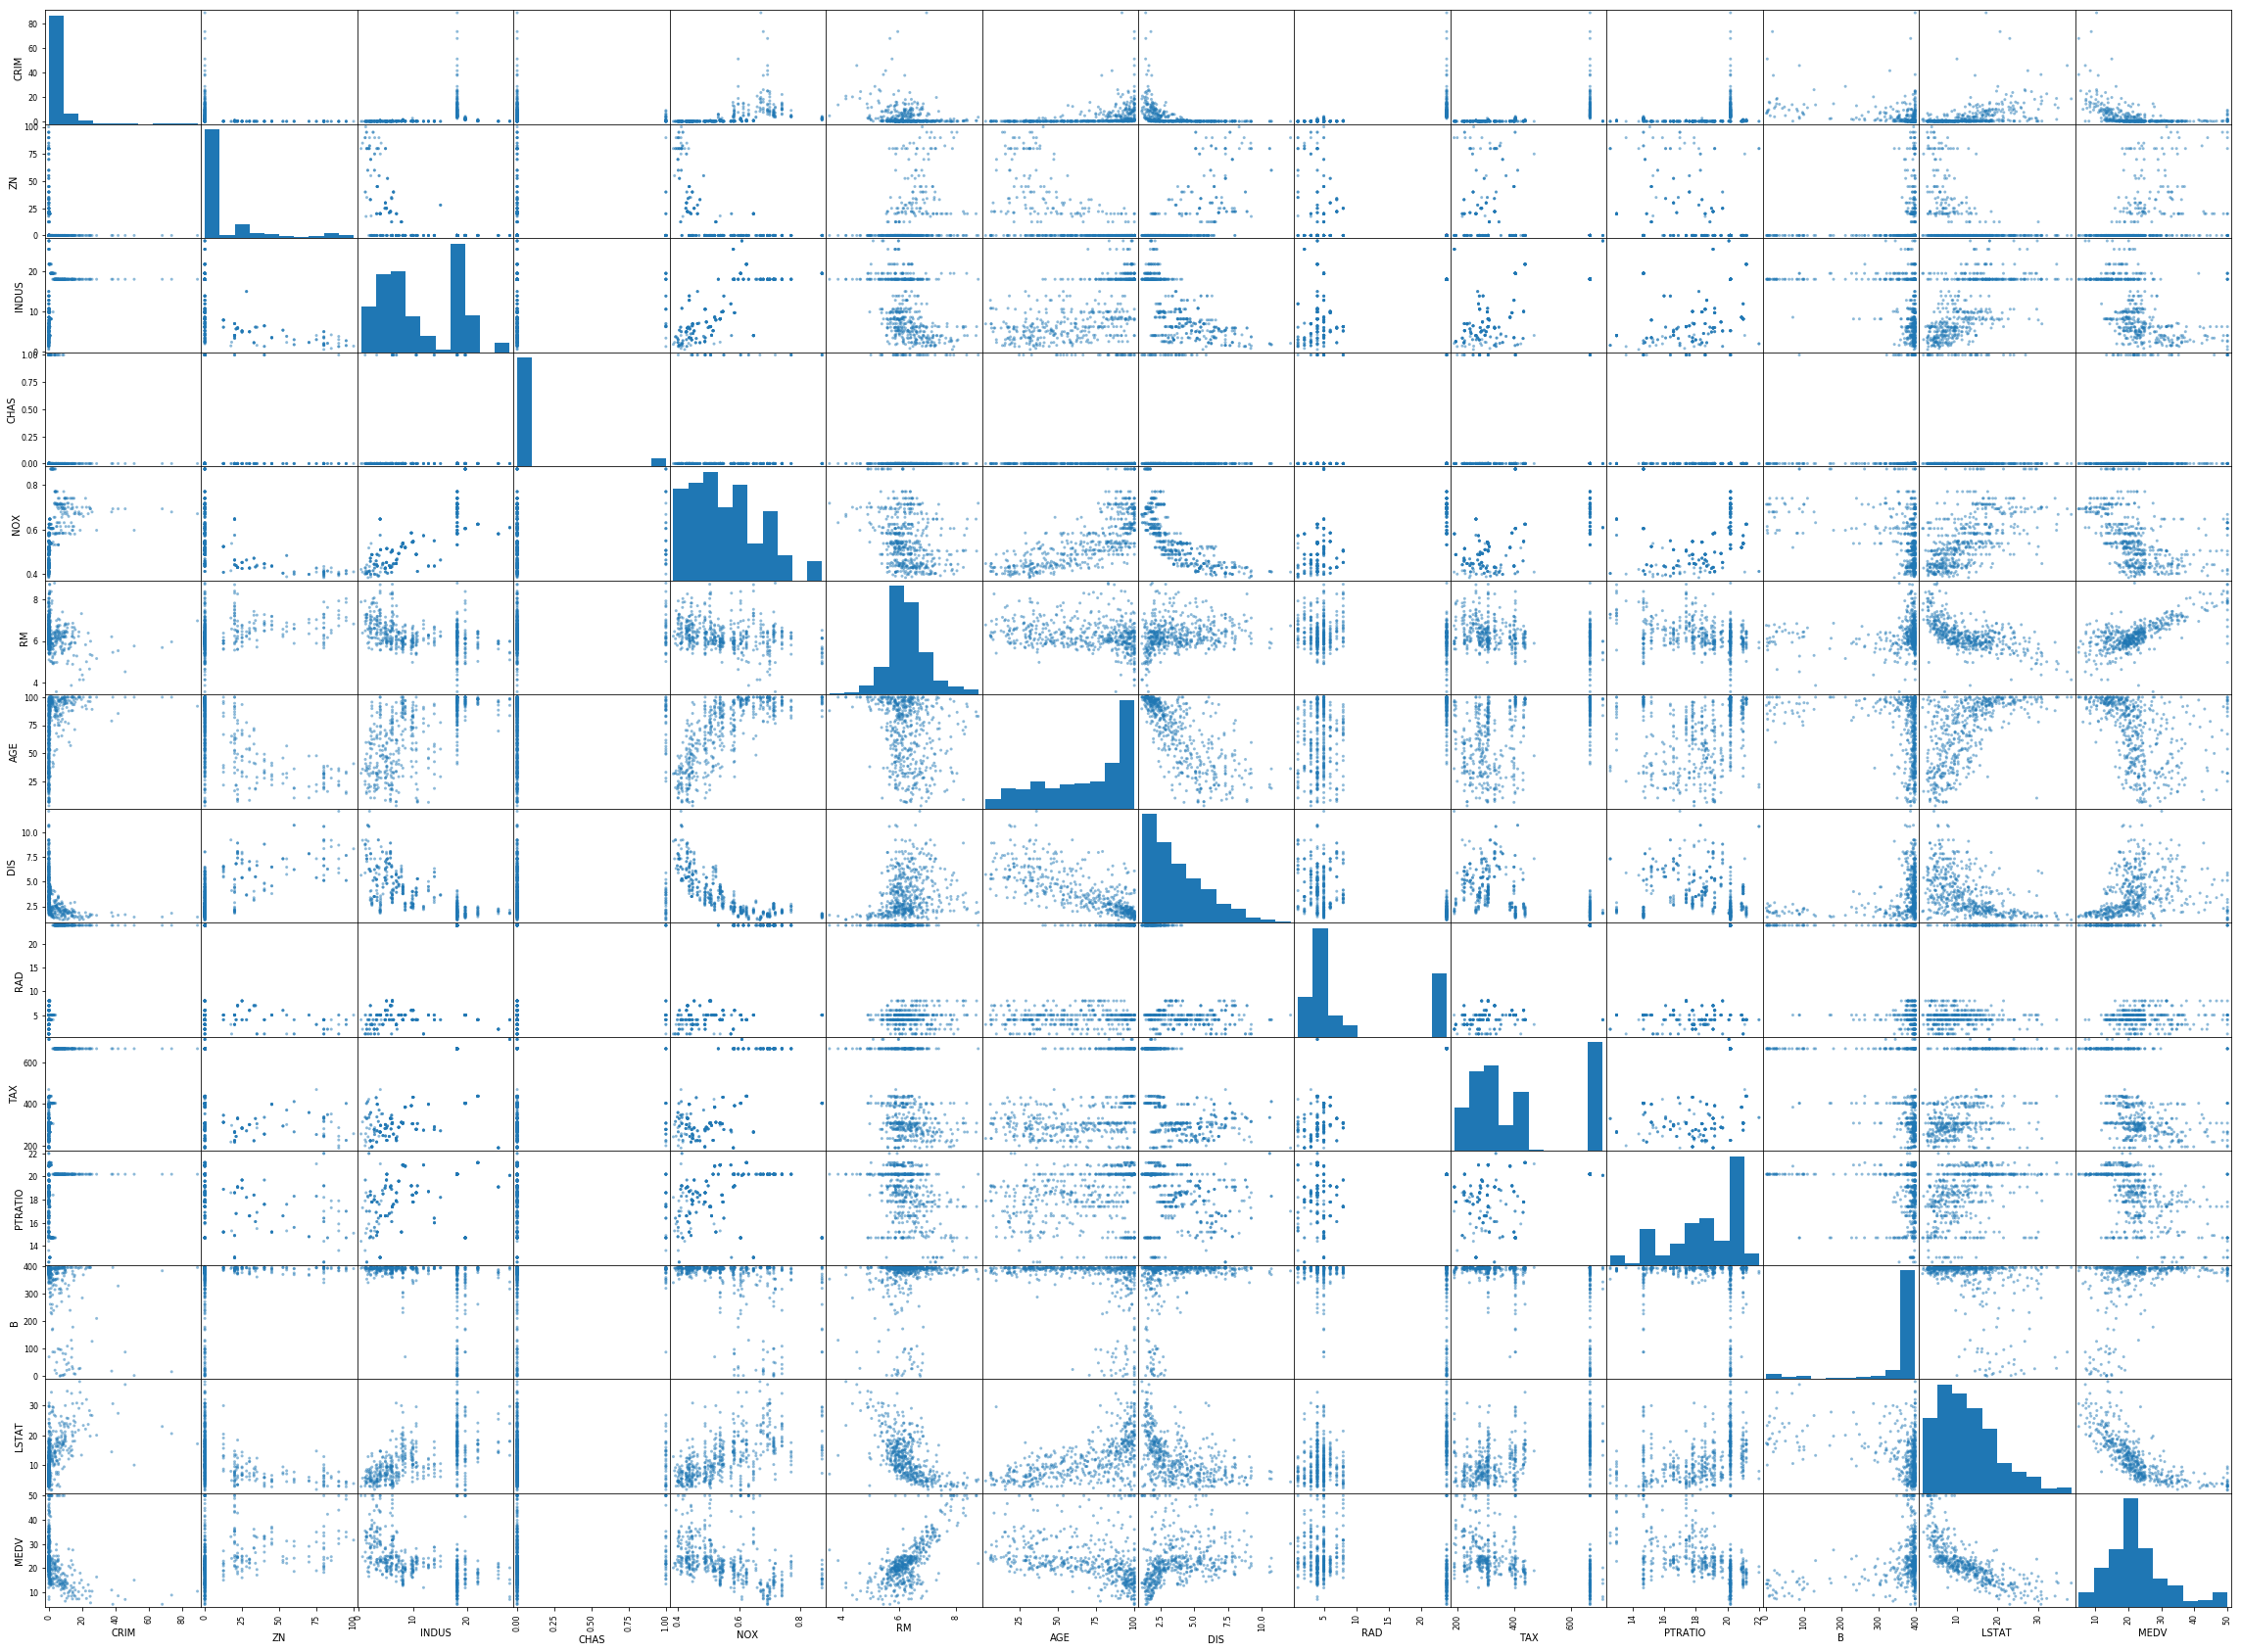

In [9]:

# scatter plot matrix
rcParams['figure.figsize'] = 40, 30
scatter_matrix(dataset)
pyplot.show()




## Observation : Some features are highly correlated with each other and show both linear and non linear relashionships.

# Now lets look at the correlation matrix heat map to get an idea of quantitative understanding of correlation between the variables

## Also using this one may choose to discard the features which are correlated and keeping only one out of two.

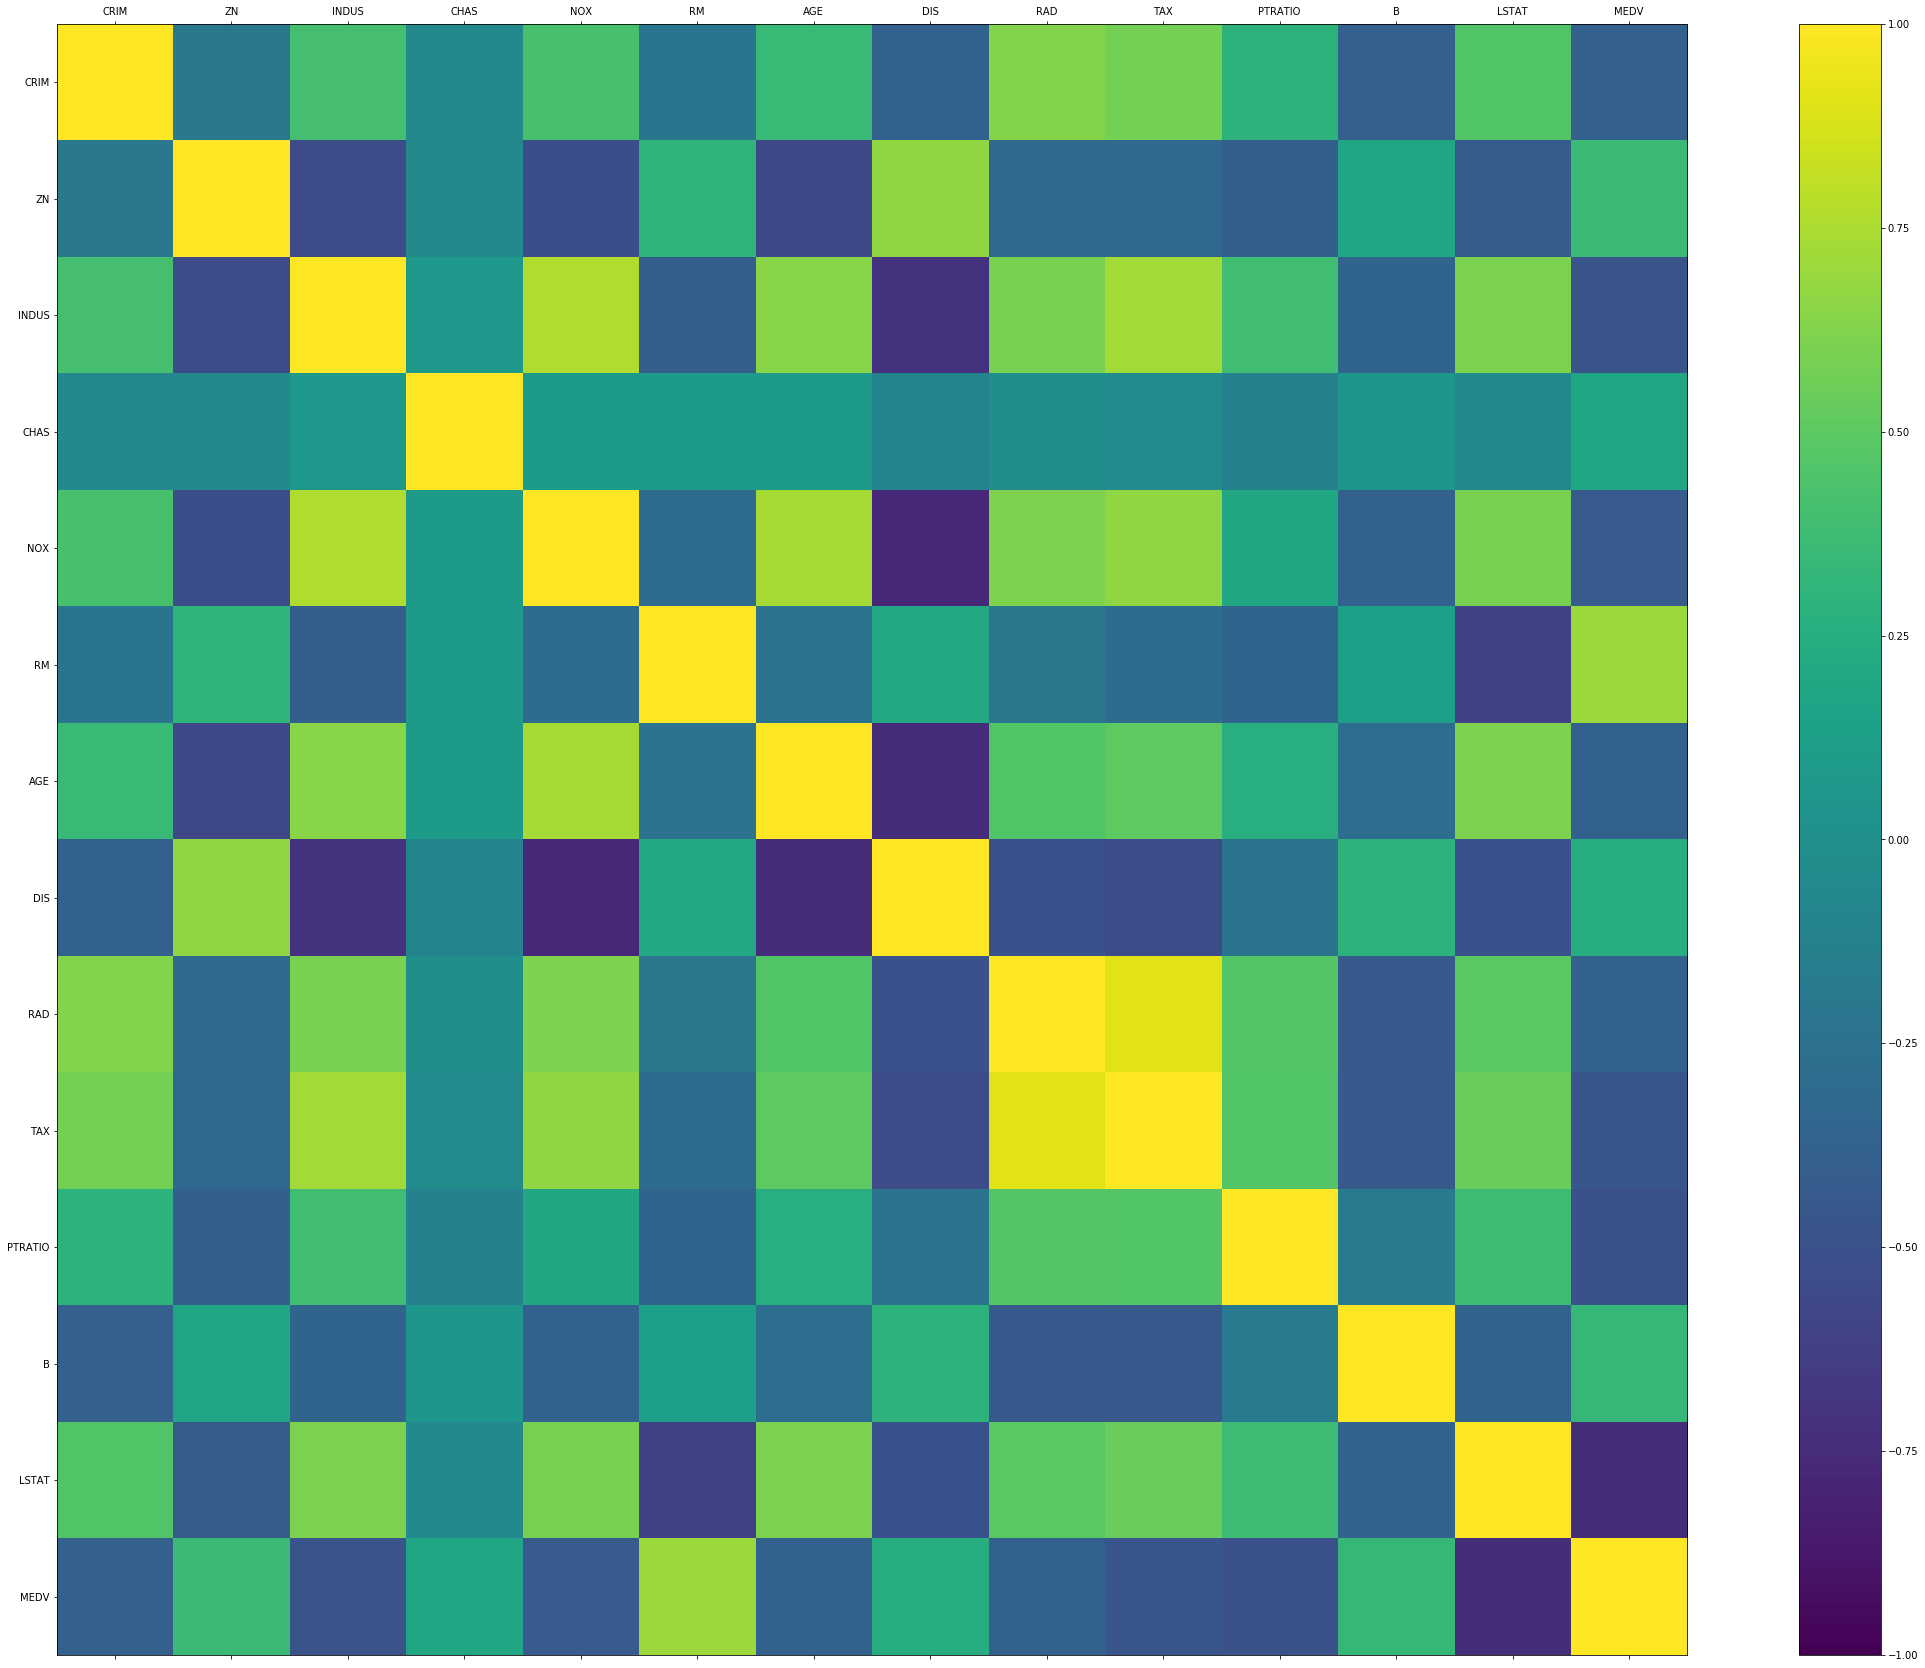

In [10]:
# correlation matrix
rcParams['figure.figsize'] = 40, 30
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()


# Since the response variable is continues, 1st choice of processing this data is regression specifically Multiple Linear Regression. Lets plot the relationships of variable predictors with respect to response variable.

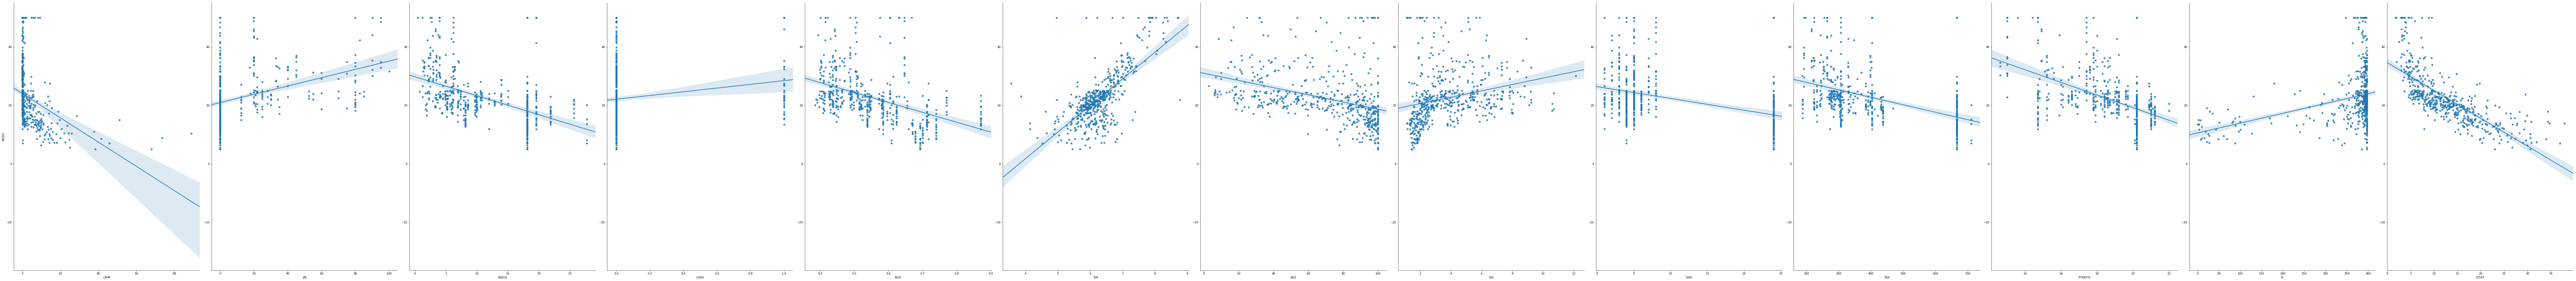

In [11]:
%matplotlib inline
fig=pyplot.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.pairplot(dataset,x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars='MEDV', size=14, aspect=0.7, kind='reg')

In [12]:
# Lets use STATSMODEL package with OLS method to see the odds ratio of each predictors for response variable

In [13]:
### STATSMODELS ###

# create a fitted model with all 13 features
lm1 = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=dataset).fit()


In [14]:
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          6.72e-135
Time:                        17:40:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observation: 

    Adj. R-squared indicates that 73% of housing prices can be explained by all predictor variables

    The regression coefficient (coef) represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant. In our model, a one unit increase in Crime rate Index reduces housing_price_index by 0.11. 

    The standard error measures the accuracy of coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population. Our standard error for Crime Index, 0.03, is low and therefore appears accurate.

    p-value indicates that the results are statistically significant, that is in general the p-value is less than 0.05.


    The confidence interval is a range within which our coefficient is likely to fall. We can be 95% confident that CRIM  coefficient will be within our confidence interval, [-0.173	-0.043].

# Relevent predictor selection

By looking at Pvalue (p< Level of significance alpha) or CI (not including 0 value) one can choose features (predictors) which are best suitable to predicting the outcome of Housing prices.

In [15]:
alpha = 0.001;# Level of Significance
TrueFeatures=lm1.pvalues<alpha
print(TrueFeatures)


Intercept     True
CRIM         False
ZN            True
INDUS        False
CHAS         False
NOX           True
RM            True
AGE          False
DIS           True
RAD           True
TAX          False
PTRATIO       True
B             True
LSTAT         True
dtype: bool


# Approach 2 : Other regression algorithms

Another way of analyzing this data is to use various other regression algorithms and select the best performing method for predicting housing prices.

Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this regression problem. The six algorithms selected include:

* Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).

* Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

### Cross-Validation


Also to increase the robustness of this method (i.e. How generalizes this method to predict unseen/future data: Low generalization error) one should consider cross-validation method

In [16]:
# Split-out validation dataset

array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
## Seed point, inorder to retain the same result for differnt runs
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Evaluate Algorithms


LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -25.386602 (12.056294)
SVR: -85.518342 (31.994798)


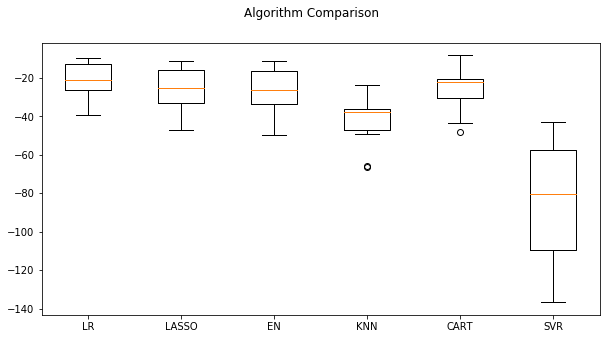

In [17]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

#%matplotlib inline
rcParams['figure.figsize'] = 10, 5

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()




# Standardize the dataset

Differing scales of the raw data may be negatively impacting the skill of some of the algorithms hence it is importnat to do data standardization, where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1

Use of package sklearn.pipeline.Pipeline: The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. Note that We need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -25.980740 (8.853799)
ScaledSVR: -29.633086 (17.009186)


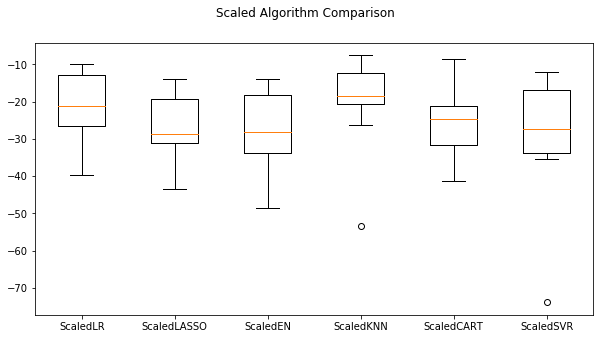

In [18]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
rcParams['figure.figsize'] = 10, 5
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Using Deep Learning technique

### One can observe that deep learning will not always outperform the traditional classifier (see below)

In [6]:
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
filename = 'housingdata.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, names=names)
# split into input (X) and output (Y) variables
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -22.83 (25.33) MSE


# KNN Algorithm tuning

In [19]:

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


# Ensemble Modeling

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:


   * Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
    
   * Bagging Methods: Random Forests (RF) and Extra Trees (ET).

ScaledAB: -15.685041 (6.703085)
ScaledGBM: -10.242672 (4.628977)
ScaledRF: -13.486236 (6.241619)
ScaledET: -10.524502 (5.301345)


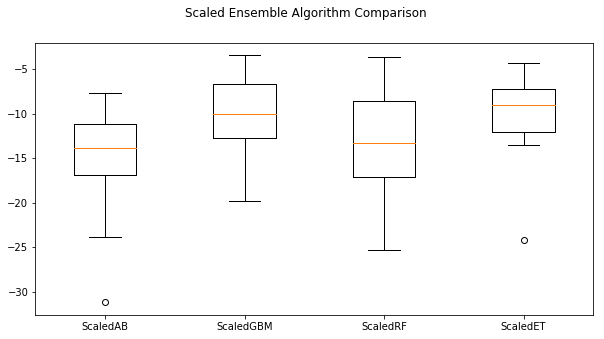

In [20]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Tune scaled GBM

In [21]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.356471 using {'n_estimators': 400}
-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694096 (4.275762) with: {'n_estimators': 150}
-9.539706 (4.270637) with: {'n_estimators': 200}
-9.448764 (4.262603) with: {'n_estimators': 250}
-9.429946 (4.273791) with: {'n_estimators': 300}
-9.369824 (4.254108) with: {'n_estimators': 350}
-9.356471 (4.267837) with: {'n_estimators': 400}


# Make predictions on validation dataset 

## Using best model selected

In [22]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=3)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

33.1874074074


# Make predictions on validation dataset 

## Using ensembles

In [23]:

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))


11.8752520792


# How would you deploy your model to production?

### There are two ways of doing so

1) setup your model as a web service.

2) Make a standalone application for the clientside

For (1) detailed explanation is given by my mentor Jason brownlee's link https://www.quora.com/What-is-the-easiest-way-to-deploy-a-machine-learning-model-say-a-regression-for-production
one may use FLASK tool

For (2) one need to make GUI based application of this prediction model for more user/client interaction e.g. GUI tools TkInter or PyQt and deploy the application as executable. For example as shown in http://pythonhosted.org/PyQt-Fit/GUI_tut.html

Note: simple Flask application is shown in Chatbot case.